In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
%cd "C:\DSBA\Advanced BA\Project"

C:\DSBA\Advanced BA\Project


In [3]:
df=pd.read_csv('vr__VR_Email_History_Contact__c.csv')
df.head()

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,vr__Bounced__c,...,vr__Email_ID__c,vr__Email_Type__c,vr__List_Type__c,vr__Mail_Date__c,vr__Clicked_Links__c,vr__Company_Hash__c,vr__Contact__c,vr__Opened__c,vr__Sent__c,vr__Unsubscribed__c
0,a0Z0z00000DIN2LEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0035000000e6Gn9AAE,0,1,0
1,a0Z0z00000DIN2MEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0033800002ZBO9ZAAX,0,1,0
2,a0Z0z00000DIN2NEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,003500000225PVEAA2,0,1,0
3,a0Z0z00000DIN2OEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0033800002iDRB4AAO,0,1,0
4,a0Z0z00000DIN2PEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0033800002gzSfaAAE,0,1,0


In [4]:
df.shape

(378099, 22)

In [5]:
df.isnull().sum()

Id                           0
OwnerId                      0
IsDeleted                    0
Name                         0
CreatedDate                  0
CreatedById                  0
LastModifiedDate             0
LastModifiedById             0
SystemModstamp               0
vr__Bounced__c               0
vr__Campaign_Hash__c         0
vr__Clicked__c               0
vr__Email_ID__c              0
vr__Email_Type__c            0
vr__List_Type__c             0
vr__Mail_Date__c             0
vr__Clicked_Links__c    377496
vr__Company_Hash__c          0
vr__Contact__c          158507
vr__Opened__c                0
vr__Sent__c                  0
vr__Unsubscribed__c          0
dtype: int64

In [6]:
df['vr__Email_Type__c'].value_counts()

template    262388
canvas       77591
freeform     38120
Name: vr__Email_Type__c, dtype: int64

In [7]:
df['vr__List_Type__c'].value_counts()

Salesforce Campaign      311367
Salesforce Mass Email     66732
Name: vr__List_Type__c, dtype: int64

In [8]:
df['vr__Campaign_Hash__c'].value_counts()

563581b1f1    16840
a581043d8d    15987
e70d709f0b    15987
c5d2d0978e    15205
32d2f55e49    11695
              ...  
10361a11d6       24
e005813f7e       17
3cb5ff18c7       14
c047c89d1e       11
be276bb888       11
Name: vr__Campaign_Hash__c, Length: 116, dtype: int64

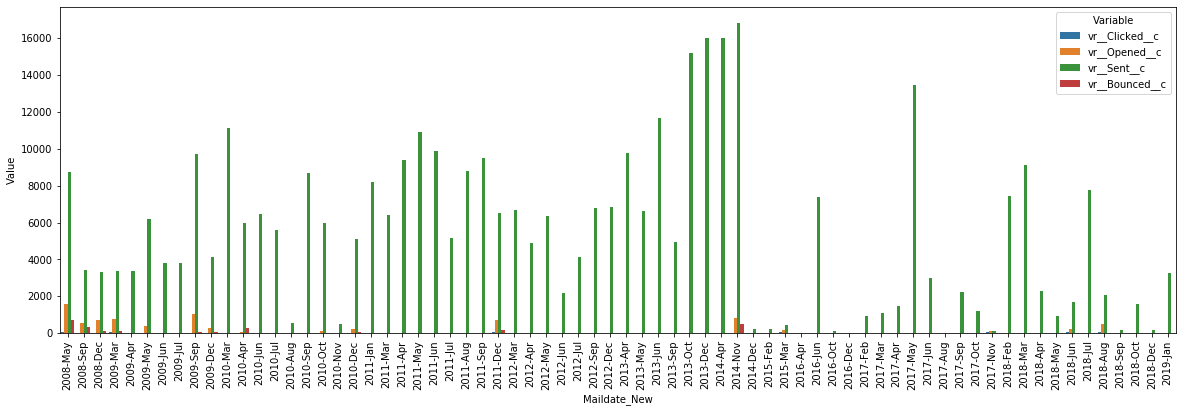

In [44]:
camp=df[['vr__Mail_Date__c','vr__Clicked__c','vr__Opened__c','vr__Sent__c','vr__Bounced__c']]
camp['vr__Mail_Date__c']=pd.to_datetime(camp['vr__Mail_Date__c'])
camp['MailDate_new'] = camp['vr__Mail_Date__c'].apply(lambda dt: dt.replace(day=1))
camp['MailDate_new']=camp['MailDate_new'].dt.date


mnth=camp.groupby(['MailDate_new']).sum()
mnth.reset_index(inplace=True)

# PLOTTING
tidy = mnth.melt(id_vars='MailDate_new').rename(columns=str.title)
fig, ax = plt.subplots(figsize = (20,6))    
fig = sns.barplot(x = "Maildate_New", y = "Value",hue='Variable', data = tidy, 
                  ci = None, ax=ax)

x_dates = pd.to_datetime(tidy['Maildate_New']).dt.strftime('%Y-%b').unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='center')

plt.show()

The donations that had come on Aril 2016 might have been used for marketing

In [46]:
#mnth.to_csv('date.csv')